In [65]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [66]:
beta = -0.00477517
sigma_r = 100
sigma_n = 100
epsilon = 0.01

In [67]:
R = cv2.imread('./Images/RealImage.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE) 
N = cv2.imread('./Images/NewImage.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE) 

mean = 0
row_r, col_r = R.shape
row_n, col_n = N.shape
# We are not how to represent the PSF used. 
PSF_r = np.random.normal(mean, 3, (row_r,col_r))
PSF_n = np.random.normal(mean, 3, (row_n,col_n))

In [68]:
fourier_R = fft.fft2(R)
fourier_N = fft.fft2(N)
fourier_PSF_r = fft.fft2(PSF_r)
fourier_PSF_n = fft.fft2(PSF_n)

In [69]:
# Fs are assigned as the article suggests
F_r = 1
F_n = beta

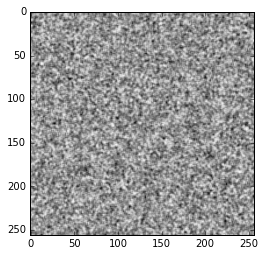

In [70]:
#Finds S
denom = (sigma_r**2)*(F_n**2)*(fourier_PSF_n*conjugate(fourier_PSF_n)) 
denom = denom + (sigma_n**2)*(F_r**2)*(fourier_PSF_r*conjugate(fourier_PSF_r)) + epsilon
                               
fourier_S = (F_n)*(F_r**2)*conjugate(fourier_PSF_n)*(fourier_PSF_r*conjugate(fourier_PSF_r))*fourier_N
fourier_S = fourier_S - (F_r)*(F_n**2)*conjugate(fourier_PSF_r)*(fourier_PSF_n*conjugate(fourier_PSF_n))*fourier_R
fourier_S = fourier_S/denom
S = ifft2(fourier_S)
plt.imshow(real(S), cmap="Greys_r")

In [71]:
maximum_S = amax(real_S)
print(maximum_S)
for i in range(len(S)):
    for j in range(len(S)):
        if real_S[i][j] == maximum_S:
            print(i)
            print(j)
        else:
            real_S[i][j] = 0

(255+0j)
2
228
